In [1]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
print("x.shape={},y.shape={}".format(x.shape, y.shape))

x.shape=torch.Size([150, 4]),y.shape=torch.Size([150])


In [4]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3),
)
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [10]:
kl_weight = 0.1
for step in range(3000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

In [6]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

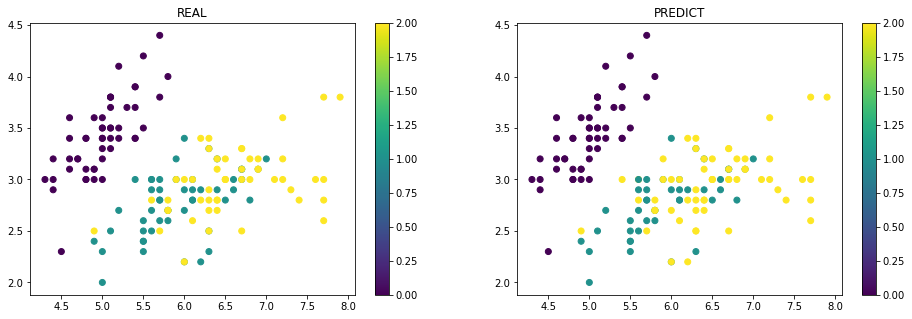

In [7]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

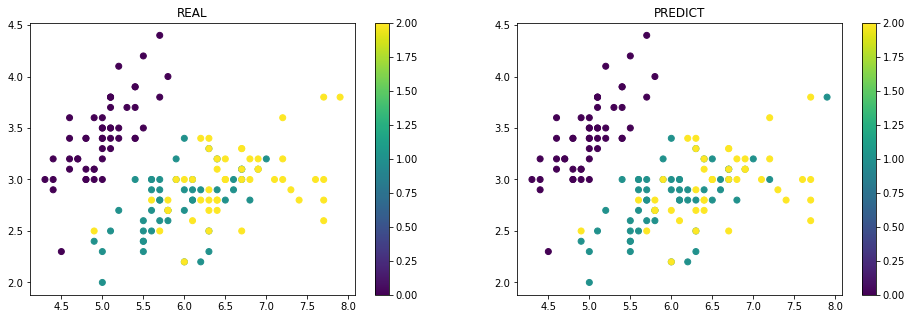

In [8]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

In [10]:
import numpy as np

all_states = np.load("all_states.npy")
action_rewards = np.load("action_rewards.npy")

state_size = all_states.shape[1]
n_actions = action_rewards.shape[1]

print("all_states shape: {}, action_rewards shape: {}".format(all_states.shape, action_rewards.shape))
print("State size: %i, actions: %i" % (state_size, n_actions))

all_states shape: (1797, 60), action_rewards shape: (1797, 10)
State size: 60, actions: 10
